# Saving Data Locally 

Grid Status provides standardized access to the APIs and data provided by independent system operators (ISOs), but it does not ?distribute the data itself.

If you want to save the data locally, you can use the `save_to` parameter to make it easier to save and access the data in the future. This way, you won't have to redownload the data every time you want to use it. 

You can then use the `load_folder` method to reload the saved data.

In [16]:
import gridstatus
import plotly.express as px

In [3]:
iso = gridstatus.NYISO()

First, let's use Grid Status to grab a few years of fuel mix data from NYISO. We can specify the local directory where we want the data to be saved using the save_to parameter. This parameter is supported by all methods in Grid Status, so you can use it with any method that retrieves data.

In [9]:
iso.get_fuel_mix(start="Jan 1, 2020", end="Dec 1, 2022", save_to="nyiso_fuel_mix/")

100%|██████████| 35/35 [00:51<00:00,  1.49s/it]


,Time,Dual Fuel,Hydro,Natural Gas,Nuclear,Other Fossil Fuels,Other Renewables,Wind
0,2020-01-01 00:05:00-05:00,2350.0,3279.0,1883.0,5418.0,1.0,277.0,883.0
1,2020-01-01 00:10:00-05:00,2207.0,3113.0,1801.0,5420.0,1.0,273.0,851.0
2,2020-01-01 00:15:00-05:00,2133.0,3018.0,1848.0,5422.0,1.0,275.0,852.0
3,2020-01-01 00:20:00-05:00,2047.0,3059.0,1929.0,5421.0,1.0,274.0,863.0
4,2020-01-01 00:25:00-05:00,2035.0,3092.0,1946.0,5419.0,1.0,271.0,861.0
...,...,...,...,...,...,...,...,...
312914,2022-11-30 23:40:00-05:00,2454.0,2434.0,3673.0,3342.0,0.0,253.0,1651.0
312915,2022-11-30 23:45:00-05:00,2447.0,2352.0,3628.0,3342.0,0.0,252.0,1684.0
312916,2022-11-30 23:50:00-05:00,2420.0,2309.0,3566.0,3342.0,0.0,253.0,1715.0
312917,2022-11-30 23:55:00-05:00,2342.0,2256.0,3538.0,3342.0,0.0,252.0,1728.0


This will retrieve the fuel mix data for the specified time period and save it to the specified local directory. You can then use the `load_folder` method to reload the saved data.

Before we do that, let's look at our load folder. As you can see below there are now multiple files


In [15]:
!ls nyiso_fuel_mix/ | head -n 10

/Users/kanter/.zshenv:1: unknown file attribute: y
NYISO_get_fuel_mix_20200101_20200201.csv
NYISO_get_fuel_mix_20200201_20200301.csv
NYISO_get_fuel_mix_20200301_20200401.csv
NYISO_get_fuel_mix_20200401_20200501.csv
NYISO_get_fuel_mix_20200501_20200601.csv
NYISO_get_fuel_mix_20200601_20200701.csv
NYISO_get_fuel_mix_20200701_20200801.csv
NYISO_get_fuel_mix_20200801_20200901.csv
NYISO_get_fuel_mix_20200901_20201001.csv
NYISO_get_fuel_mix_20201001_20201101.csv


Now, let's load the data back in. By default, the data will be loaded with UTC time. We can use the time_zone parameter to specify a different timezone. In this case, let's use the default time zone for NYISO

In [10]:
df = gridstatus.load_folder(
    "nyiso_fuel_mix/", time_zone=gridstatus.NYISO.default_timezone
)
df

100%|██████████| 35/35 [00:00<00:00, 133.26it/s]


,Time,Dual Fuel,Hydro,Natural Gas,Nuclear,Other Fossil Fuels,Other Renewables,Wind
0,2020-01-01 00:05:00-05:00,2350.0,3279.0,1883.0,5418.0,1.0,277.0,883.0
1,2020-01-01 00:10:00-05:00,2207.0,3113.0,1801.0,5420.0,1.0,273.0,851.0
2,2020-01-01 00:15:00-05:00,2133.0,3018.0,1848.0,5422.0,1.0,275.0,852.0
3,2020-01-01 00:20:00-05:00,2047.0,3059.0,1929.0,5421.0,1.0,274.0,863.0
4,2020-01-01 00:25:00-05:00,2035.0,3092.0,1946.0,5419.0,1.0,271.0,861.0
...,...,...,...,...,...,...,...,...
312914,2022-11-30 23:40:00-05:00,2454.0,2434.0,3673.0,3342.0,0.0,253.0,1651.0
312915,2022-11-30 23:45:00-05:00,2447.0,2352.0,3628.0,3342.0,0.0,252.0,1684.0
312916,2022-11-30 23:50:00-05:00,2420.0,2309.0,3566.0,3342.0,0.0,253.0,1715.0
312917,2022-11-30 23:55:00-05:00,2342.0,2256.0,3538.0,3342.0,0.0,252.0,1728.0


To see that the data is correct, we can plot the data. Let's plotly the average hourly fuel mix

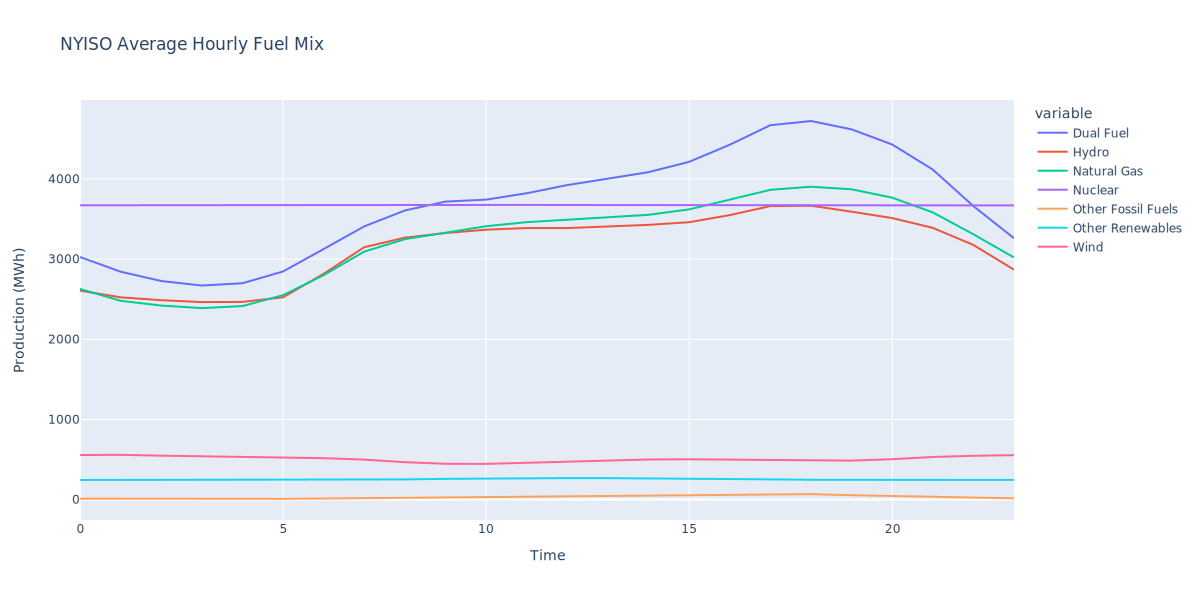

In [22]:
hourly = df.set_index("Time").resample("H").mean()
avg_hourly = hourly.groupby(hourly.index.hour).mean()

fig = px.line(avg_hourly, y=avg_hourly.columns, title="NYISO Average Hourly Fuel Mix")
fig.update_yaxes(title="Production (MWh)")
fig.show("svg", width=1200, height=600)